## Deep Neural Network using Mini Batch Gradient Descent and Adam Optimizer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Flatten

%matplotlib inline

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("X Train: {}".format(x_train.shape))
print("------------------------")
print("Y Train: {}".format(x_test.shape))

X Train: (60000, 28, 28)
------------------------
Y Train: (10000, 28, 28)


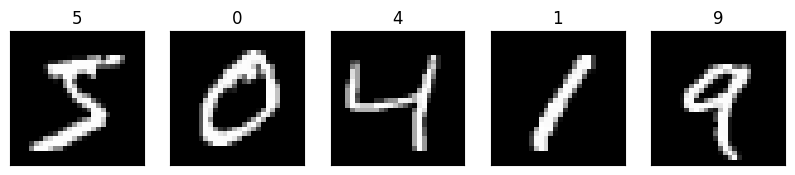

In [ ]:
# Plotting sample images

fig, axes = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Normalizing
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
gradient_optimizer = Adam(learning_rate=0.01)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy', optimizer=gradient_optimizer,metrics=['accuracy'])

In [ ]:
# traning model
history = model.fit(x_train, y_train,batch_size=200,epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
240/240 [==============================] - 5s 17ms/step - loss: 0.2763 - accuracy: 0.9156 - val_loss: 0.1493 - val_accuracy: 0.9557
Epoch 2/10
240/240 [==============================] - 4s 16ms/step - loss: 0.1212 - accuracy: 0.9635 - val_loss: 0.1311 - val_accuracy: 0.9607
Epoch 3/10
240/240 [==============================] - 4s 17ms/step - loss: 0.0966 - accuracy: 0.9700 - val_loss: 0.1210 - val_accuracy: 0.9636
Epoch 4/10
240/240 [==============================] - 3s 14ms/step - loss: 0.0757 - accuracy: 0.9764 - val_loss: 0.1193 - val_accuracy: 0.9649
Epoch 5/10
240/240 [==============================] - 2s 10ms/step - loss: 0.0641 - accuracy: 0.9793 - val_loss: 0.1148 - val_accuracy: 0.9707
Epoch 6/10
240/240 [==============================] - 2s 10ms/step - loss: 0.0532 - accuracy: 0.9827 - val_loss: 0.1524 - val_accuracy: 0.9610
Epoch 7/10
240/240 [==============================] - 3s 12ms/step - loss: 0.0550 - accuracy: 0.9825 - val_loss: 0.1229 - val_accuracy: 0.9685

In [ ]:
result = model.predict(x_test, verbose=1)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_pred = result.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9717

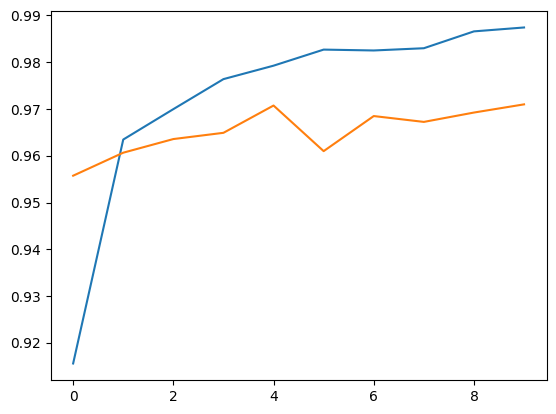

In [ ]:
# Plotting Accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

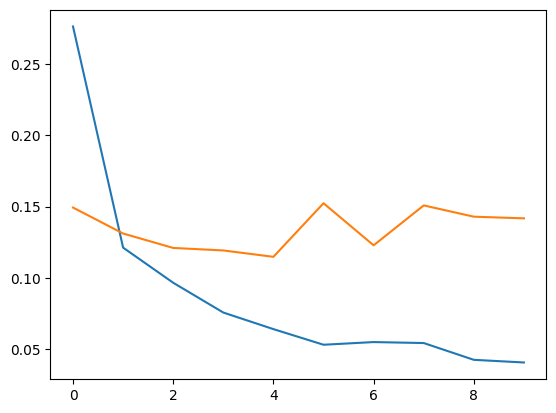

In [ ]:
# Plotting Loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
# Results
# Train Accuracy: 98.60%
# Test Accuracy: 96.98%